In [85]:
import pandas as pd
import seaborn as sns
df1 = pd.read_csv("countries.csv")
df2 = pd.read_csv("global_holidays.csv")
df3 = pd.read_csv("monthly_passengers.csv")
dens_p=pd.read_csv("densidad_p.csv")

In [2]:
# Esto me sirve para saber cuantos dias festivos oficiales hay en cada país.
s=df2.groupby("ADM_name")["Name"].nunique()
s.sort_values().tail(60)

ADM_name
Cayman-islands      26
Belarus             26
Indonesia           27
Trinidad            27
Kosovo              27
Albania             27
Barbados            28
Brunei              28
Brazil              28
Norway              29
Argentina           29
Lebanon             29
Solomon-islands     30
Slovakia            30
Puerto-rico         31
Macedonia           31
Vietnam             31
Ghana               31
Latvia              32
Australia           32
Romania             32
South-korea         32
Micronesia          32
Nigeria             32
Switzerland         32
Colombia            33
China               33
Bangladesh          34
Kyrgyzstan          34
Russia              34
Azerbaijan          34
Bulgaria            35
South-africa        35
Hungary             35
Egypt               35
Pakistan            37
Sri-lanka           38
Cambodia            38
Hong-kong           39
Mexico              39
New-zealand         39
Uk                  39
Armenia             39
Ka

In [3]:
gg=df2.groupby("Name")["ADM_name"].nunique()
gg.sort_values().iloc[2280:]

Name
Labour Day                  43
Constitution Day            43
Eid al-Adha                 43
Assumption of Mary          44
Father's Day                45
All Saints' Day             46
Whit Monday                 47
Eid al-Fitr                 48
Ascension Day               50
New Year's Day observed     51
Mother's Day                52
Valentine's Day             53
Labor Day / May Day         57
Christmas Eve               69
Boxing Day                  70
Easter Sunday               80
New Year's Eve              99
New Year's Day             110
Independence Day           116
Easter Monday              118
Good Friday                138
Christmas Day              185
Name: ADM_name, dtype: int64

In [87]:
df2["Date"]=pd.to_datetime(df2["Date"])
df2["Year"]=df2["Date"].dt.year
df2["Month"]=df2["Date"].dt.month

In [89]:
filt=df3
filt["Dom%"]=(filt["Domestic"]/filt["Total"])*100
filt["Int%"]=(filt["International"]/filt["Total"])*100
filt["OS%"]=(filt["Total_OS"]/filt["Total"])*100

In [91]:
iso_to_continent = {
    # Europa
    "ALB": "Europe", "UKR": "Europe", "ARM": "Europe", "AUT": "Europe",
    "BEL": "Europe", "BGR": "Europe", "HUN": "Europe", "BIH": "Europe",
    "BLR": "Europe", "CHE": "Europe", "CYP": "Europe", "CZE": "Europe",
    "DEU": "Europe", "DNK": "Europe", "ESP": "Europe", "EST": "Europe",
    "FIN": "Europe", "FRA": "Europe", "FRO": "Europe", "GBR": "Europe",
    "GIB": "Europe", "GRC": "Europe", "HRV": "Europe", "IRL": "Europe",
    "ISL": "Europe", "ITA": "Europe", "LTU": "Europe", "LUX": "Europe",
    "LVA": "Europe", "MKD": "Europe", "MLT": "Europe", "MNE": "Europe",
    "NLD": "Europe", "NOR": "Europe", "POL": "Europe", "PRT": "Europe",
    "ROU": "Europe", "RUS": "Europe", "SRB": "Europe", "SVK": "Europe",
    "SVN": "Europe", "SWE": "Europe", "KOS": "Europe",

    # América
    "ARG": "America", "BRB": "America", "BRA": "America", "CAN": "America",
    "CHL": "America", "COL": "America", "CRI": "America", "CYM": "America",
    "DOM": "America", "ECU": "America", "GTM": "America", "JAM": "America",
    "LCA": "America", "MEX": "America", "MTQ": "America", "PAN": "America",
    "PER": "America", "PRY": "America", "USA": "America", "URY": "America", "ABW": "America",

    # Asia
    "ARE": "Asia", "BHR": "Asia", "CHN": "Asia", "HKG": "Asia",
    "IND": "Asia", "ISR": "Asia", "JPN": "Asia", "KHM": "Asia",
    "KOR": "Asia", "MAC": "Asia", "MYS": "Asia", "OMN": "Asia",
    "PHL": "Asia", "SGP": "Asia", "THA": "Asia", "TUR": "Asia",
    "TWN": "Asia", "GEO": "Asia", "PSE": "Asia",

    # África
    "EGY": "Africa", "MAR": "Africa", "NGA": "Africa", "ZAF": "Africa",

    # Oceanía
    "AUS": "Oceania", "NZL": "Oceania", "AGO": "Africa", "BDI": "Africa", "BEN": "Africa", "BFA": "Africa",
    "BWA": "Africa", "CAF": "Africa", "CIV": "Africa", "CMR": "Africa",
    "COG": "Africa", "COM": "Africa", "CPV": "Africa", "DJI": "Africa",
    "DZA": "Africa", "ERI": "Africa", "ETH": "Africa", "GAB": "Africa",
    "GHA": "Africa", "GIN": "Africa", "GMB": "Africa", "GNB": "Africa",
    "GNQ": "Africa", "KEN": "Africa", "LBR": "Africa", "LBY": "Africa",
    "LSO": "Africa", "MDG": "Africa", "MLI": "Africa", "MOZ": "Africa",
    "MRT": "Africa", "MUS": "Africa", "MWI": "Africa", "MYT": "Africa",
    "NAM": "Africa", "NER": "Africa", "REU": "Africa", "RWA": "Africa",
    "SDN": "Africa", "SEN": "Africa", "SLE": "Africa", "SOM": "Africa",
    "SSD": "Africa", "STP": "Africa", "SWZ": "Africa", "SYC": "Africa",
    "TCD": "Africa", "TGO": "Africa", "TUN": "Africa", "TZA": "Africa",
    "UGA": "Africa", "ZMB": "Africa", "ZWE": "Africa", "COD": "Africa",

    # Asia
    "AFG": "Asia", "TKM": "Asia", "AZE": "Asia", "BGD": "Asia",
    "UZB": "Asia", "BRN": "Asia", "BTN": "Asia", "KGZ": "Asia",
    "IDN": "Asia", "IRN": "Asia", "IRQ": "Asia", "JOR": "Asia",
    "KAZ": "Asia", "KWT": "Asia", "LAO": "Asia", "LBN": "Asia",
    "LKA": "Asia", "MDV": "Asia", "MMR": "Asia", "MNG": "Asia",
    "NPL": "Asia", "PAK": "Asia", "PRK": "Asia", "QAT": "Asia",
    "SAU": "Asia", "SYR": "Asia", "TJK": "Asia", "TLS": "Asia",
    "VNM": "Asia", "YEM": "Asia",

    # Europe
    "AND": "Europe", "VAT": "Europe", "MDA": "Europe", "LIE": "Europe",
    "MCO": "Europe", "SMR": "Europe",

    # America
    "AIA": "America", "VEN": "America", "ASM": "America", "ATG": "America",
    "BHS": "America", "BLM": "America", "BLZ": "America", "BMU": "America",
    "BOL": "America", "CUB": "America", "CUW": "America", "DMA": "America",
    "VCT": "America", "GRD": "America", "GUF": "America", "GUM": "America",
    "GUY": "America", "HND": "America", "HTI": "America", "IMN": "Europe",  # correction below
    "NIC": "America", "PRI": "America", "PYF": "Oceania",  # special case (French Polynesia)
    "SLV": "America", "SUR": "America", "SXM": "America", "TCA": "America",
    "TTO": "America", "VGB": "America", "VIR": "America",

    # Oceania
    "COK": "Oceania", "FJI": "Oceania", "FLK": "America",  # Falklands often grouped with SA
    "FSM": "Oceania", "GRL": "America",  # Greenland is NA politically Europe, but often NA
    "KIR": "Oceania", "MHL": "Oceania", "MNP": "Oceania", "NCL": "Oceania",
    "NRU": "Oceania", "PLW": "Oceania", "PNG": "Oceania", "SLB": "Oceania",
    "SPM": "America", "TON": "Oceania", "TUV": "Oceania", "VUT": "Oceania",
    "WLF": "Oceania", "WSM": "Oceania",

    # Notes for tricky cases:
    "GGY": "Europe", "JEY": "Europe", "IMN": "Europe"
}
df2["Continent"] = df2["ISO3"].map(iso_to_continent)

In [93]:
juntados=pd.merge(df2,filt,on=["Year","Month","ISO3"],how="inner")
juntados=pd.merge(juntados,dens_p,left_on="ADM_name",right_on="Country",how="left")

<Axes: xlabel='Month', ylabel='Int%'>

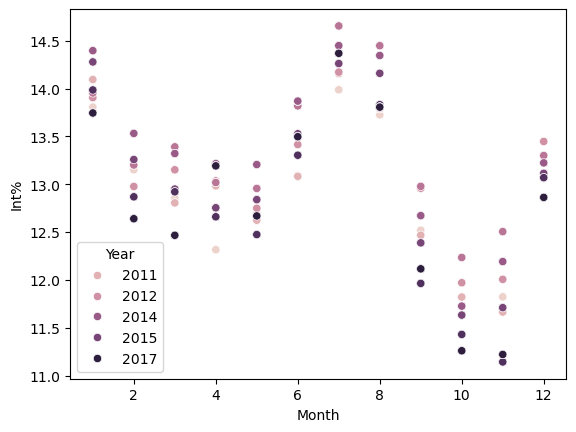

In [22]:
sns.scatterplot(
    data=juntados[(juntados["Total_OS"].notna()) & (juntados["Continent"]=="America")], x="Month", y="Int%", hue="Year"
)

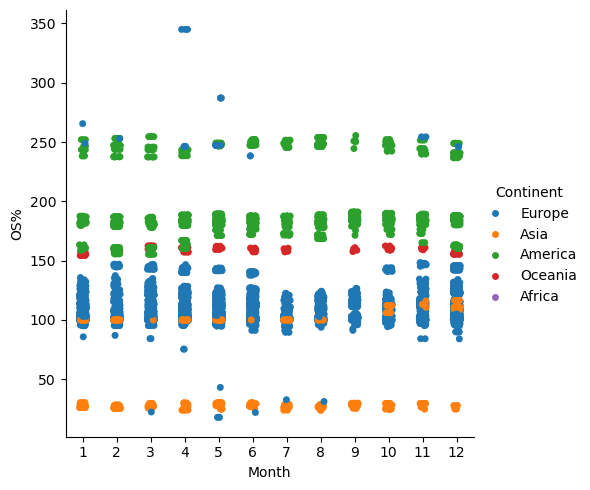

In [24]:
sns.catplot(
    data=juntados[juntados["Total_OS"].notna()], x="Month", y="OS%", hue="Continent"
)

In [95]:
dat = pd.read_json('crazy_holiday_travel_matrix.json')
cr_jun = pd.merge(juntados,dat,left_on="ISO3",right_on="origin_country",how="left")

In [101]:
dat[dat["origin_country"]=="NLD"]

,origin_country,destination_country,total_flights,Winter_Holidays_flights,Winter_Holidays_pct,Spring_Break_flights,Spring_Break_pct,Summer_Vacation_flights,Summer_Vacation_pct,Fall_Holidays_flights,Fall_Holidays_pct,Shoulder_Season_flights,Shoulder_Season_pct
0,NLD,GBR,102310,23544,23.0,30889,30.2,25333,24.8,22544,22.0,0,0
1,NLD,DEU,70160,16400,23.4,20779,29.6,17452,24.9,15529,22.1,0,0
2,NLD,ESP,65498,12878,19.7,19961,30.5,18916,28.9,13743,21.0,0,0
3,NLD,ITA,41368,8917,21.6,12664,30.6,10908,26.4,8879,21.5,0,0
4,NLD,FRA,41027,8998,21.9,12336,30.1,10877,26.5,8816,21.5,0,0
5,NLD,DNK,25944,5902,22.7,7910,30.5,6375,24.6,5757,22.2,0,0
6,NLD,PRT,23120,4752,20.6,6706,29.0,6827,29.5,4835,20.9,0,0
7,NLD,CHE,22277,5600,25.1,6604,29.6,5274,23.7,4799,21.5,0,0
8,NLD,POL,19562,4757,24.3,5682,29.0,4746,24.3,4377,22.4,0,0
9,NLD,IRL,19250,4492,23.3,5871,30.5,4762,24.7,4125,21.4,0,0
